# SA1

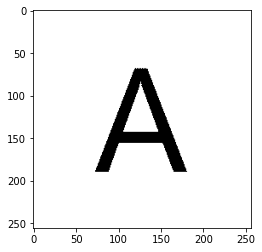

In [6]:
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

secret = np.logical_not(np.array(Image.open("../A_256.png").convert("1"), dtype=bool))
plt.imshow(secret, cmap="gray_r")

{'success': True, 'contrast': 0.164829884653925, 'nitr': 1695, 'vars': array([[4.24252751e-01, 0.00000000e+00, 5.75747249e-01],
       [6.66133815e-16, 1.00000000e+00, 0.00000000e+00],
       [7.95341430e-01, 3.21774495e-01, 0.00000000e+00]])}
False


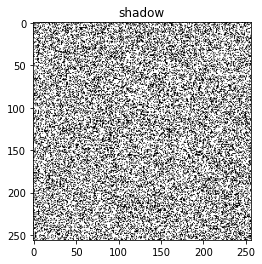

In [23]:
from optimize import optimize_sa1

K = 2
result = optimize_sa1(K, ws=25)
print(result)
if result.success:
    p0 = result.vars[0]  # 白色选择随机数发生器的概率
    p1 = result.vars[1]  # 黑色选择随机数发生器的概率
    rx = result.vars[2]  # 随机数发生器输出0(False/白色)的概率

shadows = [np.zeros(secret.shape, dtype=bool) for _ in range(K)]
D = np.zeros(secret.shape, dtype=int)
for (i, j), is_black in np.ndenumerate(secret):
    prob = p1 if is_black else p0
    rand_no = np.random.choice(a=K + 1, p=prob)
    D[i, j] = rand_no
    rand_white = rx[rand_no]
    for sh in shadows:
        sh[i, j] = np.random.choice(a=[False, True], p=[rand_white, 1 - rand_white])

plt.title("shadow")
plt.imshow(shadows[0],cmap="gray")
print((shadows[0]==shadows[1]).all())

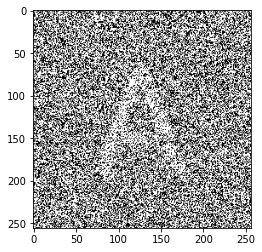

In [22]:
reveal_old=np.zeros(secret.shape,dtype=bool)
for sd in shadows:
    reveal_old=np.logical_or(reveal_old,sd)
plt.imshow(reveal_old,cmap="gray")

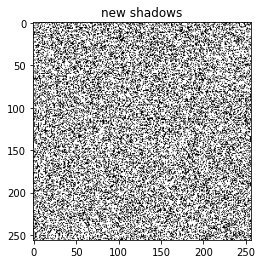

In [24]:
new_shadows = [np.zeros(secret.shape, dtype=bool) for _ in range(K)]
for (i, j), is_black in np.ndenumerate(secret):
    rand_white = rx[D[i, j]]
    for sh in new_shadows:
        sh[i, j] = np.random.choice(a=[False, True], p=[rand_white, 1 - rand_white])

plt.title("new shadows")
plt.imshow(new_shadows[0],cmap="gray")

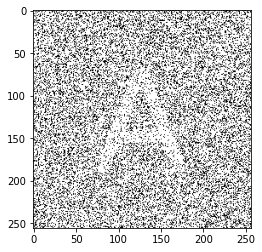

In [25]:
reveal_new=np.zeros(secret.shape,dtype=bool)
for sd in new_shadows:
    reveal_new=np.logical_or(reveal_new,sd)
plt.imshow(reveal_new,cmap="gray")